In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from stocknews import StockNews

In [ ]:
ticker = "AAPL"

start_date = '2022-02-28'
end_date = '2024-02-28'

data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
data = pd.read_csv("stock_data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5028 non-null   object 
 1   Open       5028 non-null   float64
 2   High       5028 non-null   float64
 3   Low        5028 non-null   float64
 4   Close      5028 non-null   float64
 5   Adj Close  5028 non-null   float64
 6   Volume     5028 non-null   int64  
 7   Company    5028 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 314.4+ KB


In [ ]:
# Check for missing values in the dataset
missing_values = [data.isnull().any(axis=1)]


In [ ]:
data_new = data.dropna()
data_new

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2018-11-20,44.592499,45.367500,43.877499,44.244999,42.466824,271300800,AAPL
1,2018-11-20,71.875000,76.737503,71.000000,74.773003,74.773003,217576000,AMZN
2,2018-11-20,127.029999,134.160004,126.849998,132.429993,132.429993,41939500,META
3,2018-11-20,22.783333,23.320000,22.236668,23.166000,23.166000,120070500,TSLA
4,2018-11-21,44.932499,45.067501,44.137501,44.195000,42.418831,124496800,AAPL
...,...,...,...,...,...,...,...,...
5023,2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900,AAPL
5024,2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400,META
5025,2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700,AAPL
5026,2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700,AMZN


from matplotlib import pyplot as plt
data_new['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_new['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_new['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_new['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data_new.groupby('Company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_new.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_new.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_new.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_new.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_new.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_new.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_new.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_new.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
data_new['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_new['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_new['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_new['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_new['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_new, x='Open', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_new['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_new, x='High', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_new['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_new, x='Low', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_new['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_new, x='Close', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-14-95572013d7d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data_new, x='Close', y='Company', inner='box', palette='Dark2')


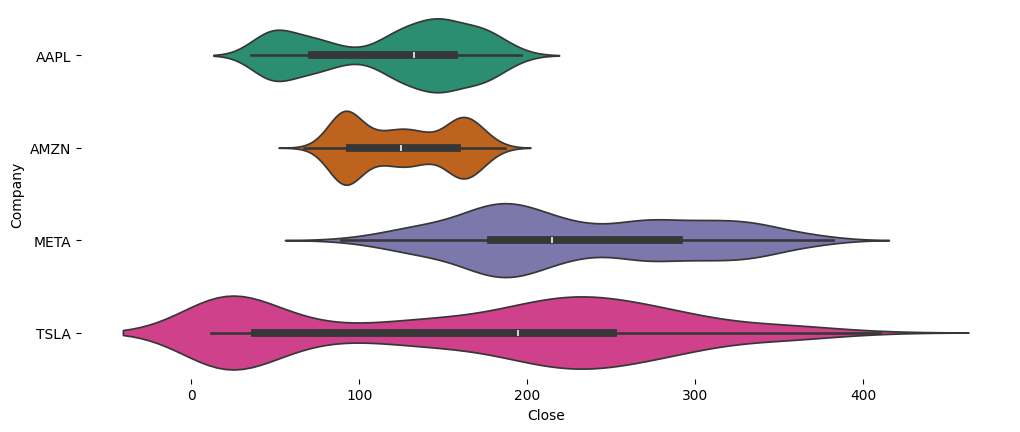

In [ ]:
figsize = (12, 1.2 * len(data_new['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_new, x='Close', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

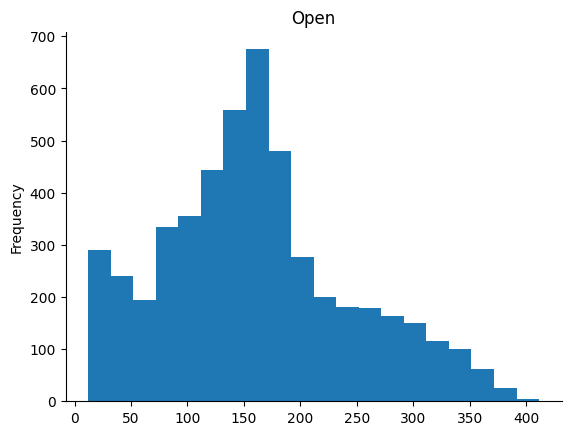

In [ ]:
# @title Open

from matplotlib import pyplot as plt
data_new['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
opening_prices = data['Open']

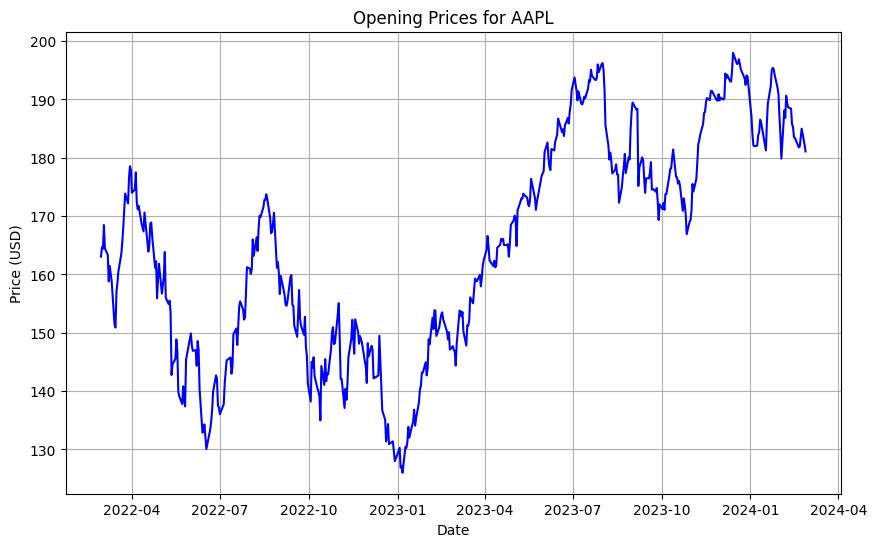

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(opening_prices, color='blue')
plt.title(f"Opening Prices for {ticker}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [ ]:
# Download stock data for Apple
aapl = yf.download("AAPL", period="1d")

# Print the closing price
print(aapl["Close"][0])


[*********************100%%**********************]  1 of 1 completed

169.1199951171875


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-10,150.210007,150.940002,147.610001,148.500000,147.711563,68572400,APPLE
2023-03-13,147.809998,153.139999,147.699997,150.470001,149.671097,84457100,APPLE
2023-03-14,151.279999,153.399994,150.100006,152.589996,151.779846,73695900,APPLE
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.177734,77167900,APPLE
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.022552,76161100,APPLE


In [ ]:
ticker = "AMZN"

start_date = '2022-02-28'
end_date = '2024-02-28'

data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Define a list of ticker symbols
ticker_symbols = ['AAPL', 'AMZN', 'META', 'TSLA']

# Create an empty dictionary to store the data for each ticker symbol
stock_data = {}

# Loop through each ticker symbol
for symbol in ticker_symbols:
    # Fetch historical data for the current ticker symbol
    data = yf.download(symbol, start='2022-01-01', end='2022-12-31')

    # Store the data in the dictionary
    stock_data[symbol] = data

# Display the first few rows of data for each ticker symbol
for symbol, data in stock_data.items():
    print(f"\n{symbol} data:")
    print(data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


AAPL data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.724564   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.443588   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.723572   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.840256   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.008118   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  

AMZN data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  167.550003  170.703506  166.160507  170.404495  170.404495   
2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


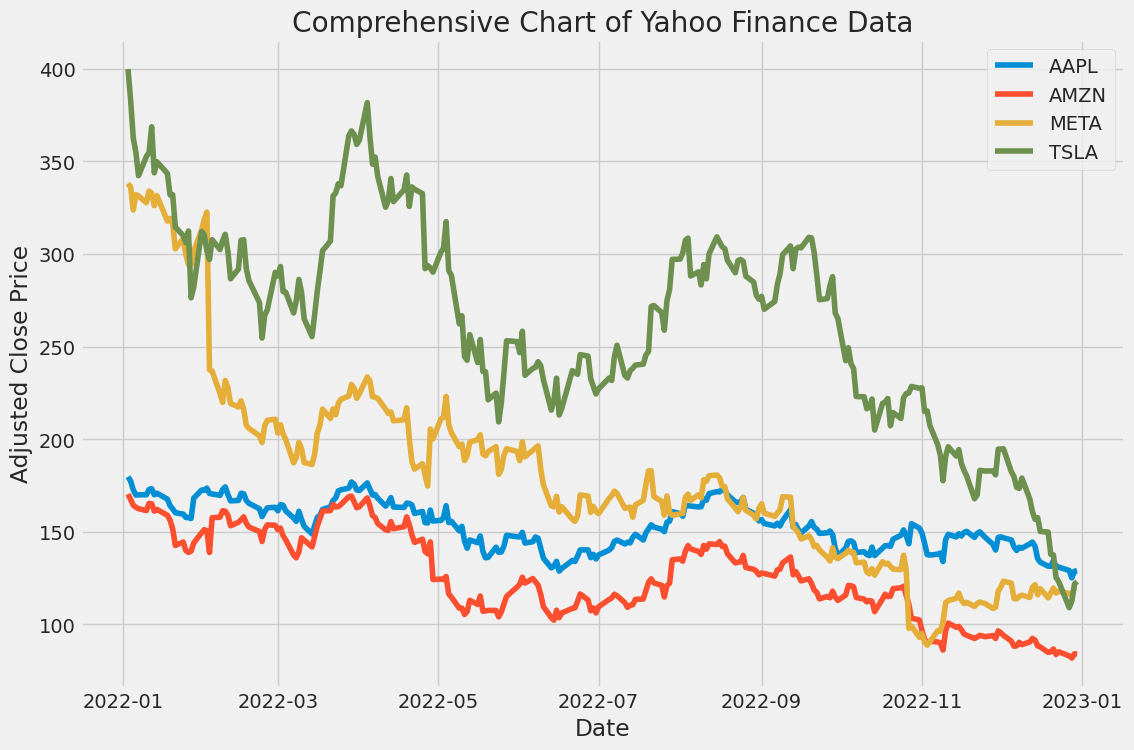

In [ ]:
# Define a list of ticker symbols
ticker_symbols = ['AAPL', 'AMZN', 'META', 'TSLA']

# Create an empty dictionary to store the data for each ticker symbol
stock_data = {}

# Loop through each ticker symbol
for symbol in ticker_symbols:
    # Fetch historical data for the current ticker symbol
    data = yf.download(symbol, start='2022-01-01', end='2022-12-31')

    # Store the data in the dictionary
    stock_data[symbol] = data

# Plot the data for each ticker symbol
plt.figure(figsize=(12, 8))

for symbol, data in stock_data.items():
    plt.plot(data.index, data['Adj Close'], label=symbol)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Comprehensive Chart of Yahoo Finance Data')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import HTML

# Define a list of ticker symbols
ticker_symbols = ['AAPL', 'AMZN', 'META', 'TSLA']

# Generate HTML code for each ticker symbol
links_html = []
for symbol in ticker_symbols:
    link_html = f'<a href="https://finance.yahoo.com/quote/{symbol}">Link to Yahoo Finance for {symbol}</a>'
    links_html.append(link_html)

# Display the hyperlinks
HTML('<br>'.join(links_html))


# New Section

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Generate some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a Plotly figure with subplots
fig = make_subplots(rows=1, cols=1)

# Add traces to the figure (lines)
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', name='sin(x)'), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines', name='cos(x)'), row=1, col=1)

# Update layout
fig.update_layout(title='Dynamic Chart', xaxis_title='X', yaxis_title='Y')

# Show the figure
fig.show()


In [ ]:
import matplotlib.animation as animation
import datetime

# Function to generate new data points
def generate_data():
    x = np.linspace(0, 10, 100)
    y = np.sin(x)
    return x, y

# Function to update the plot with new data
def update(frame):
    x, y = generate_data()
    line.set_data(x, y)
    ax.relim()
    ax.autoscale_view()
    return line,

# Create a figure and axis object
fig, ax = plt.subplots()

# Initialize the plot with empty data
line, = ax.plot([], [], lw=2)

# Set plot properties
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
ax.set_title('Moving Chart')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=10, interval=1000, blit=True)

# Show the plot
plt.show()


In [1]:
pip install alpha_vantage


In [2]:
import os
os.environ['ALPHAVANTAGE_API_KEY'] = '3GVHFFSHBKB0W6KN'

In [3]:
from alpha_vantage.timeseries import TimeSeries
API_key = '3GVHFFSHBKB0W6KN'
ts = TimeSeries(key = API_key, output_format='pandas')
data = ts.get_monthly_adjusted('AAPL')
data

(            1. open  2. high    3. low  4. close  5. adjusted close  \
 date                                                                  
 2024-04-30  171.190   178.36  164.0750    170.33           170.3300   
 2024-03-28  179.550   180.53  168.4900    171.48           171.4800   
 2024-02-29  183.985   191.05  179.2500    180.75           180.7500   
 2024-01-31  187.150   196.38  180.1700    184.40           184.1660   
 2023-12-29  190.330   199.62  187.4511    192.53           192.2856   
 ...             ...      ...       ...       ...                ...   
 2000-04-28  135.500   139.50  104.8700    124.06             0.9377   
 2000-03-31  118.560   150.38  114.0000    135.81             1.0265   
 2000-02-29  104.000   119.94   97.0000    114.62             0.8663   
 2000-01-31  104.870   121.50   86.5000    103.75             0.7842   
 1999-12-31  101.000   118.00   91.0600    102.81             0.7771   
 
                6. volume  7. dividend amount  
 date         

In [ ]:
from alpha_vantage.timeseries import TimeSeries
API_key = '3GVHFFSHBKB0W6KN'
ts = TimeSeries(key = API_key, output_format='pandas')
data = ts.get_intraday('AAPL',interval = '5min')
data[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-04-05 19:55:00,169.375,169.550,169.320,169.515,3618.0
2024-04-05 19:50:00,169.430,169.500,169.360,169.400,3699.0
2024-04-05 19:45:00,169.510,169.530,169.410,169.445,3648.0
2024-04-05 19:40:00,169.535,169.570,169.500,169.510,1803.0
2024-04-05 19:35:00,169.525,169.650,169.510,169.535,728.0
...,...,...,...,...,...
2024-04-05 12:00:00,170.210,170.390,170.116,170.160,434786.0
2024-04-05 11:55:00,170.031,170.240,170.025,170.210,523054.0
2024-04-05 11:50:00,169.930,170.070,169.930,170.040,220759.0


In [ ]:
#Analysing stock data
from alpha_vantage.fundamentaldata import FundamentalData
#annual income statement for a particular stock
key = '3GVHFFSHBKB0W6KN'
fd = FundamentalData(key,output_format = 'pandas')

data = fd.get_income_statement_annual('AAPL')
data[0].T#transposed format

date,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000011,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000000013,1970-01-01 00:00:00.000000014
fiscalDateEnding,2023-09-30,2022-09-30,2021-09-30,2020-09-30,2019-09-30,2018-09-30,2017-09-30,2016-09-30,2015-09-30,2014-09-30,2013-09-30,2012-09-30,2011-09-30,2010-09-30,2009-09-30
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
grossProfit,169148000000,170782000000,152836000000,104956000000,98392000000,101839000000,88186000000,84263000000,93626000000,70537000000,64304000000,68662000000,43818000000,25684000000,17222000000
totalRevenue,379352000000,391397000000,363172000000,271642000000,256598000000,265595000000,229234000000,215639000000,232982000000,182411000000,170774000000,156508000000,108249000000,65225000000,42905000000
costOfRevenue,239069000000,248640000000,234954000000,189475000000,180027000000,163756000000,141048000000,131376000000,163618000000,131151000000,123236000000,100486000000,73630000000,45873000000,29832000000
costofGoodsAndServicesSold,214137000000,223546000000,212981000000,169559000000,161782000000,163756000000,141048000000,131376000000,140089000000,112258000000,106606000000,87846000000,64431000000,39541000000,25683000000
operatingIncome,114301000000,119437000000,108949000000,66288000000,63930000000,70898000000,61344000000,60024000000,71230000000,52503000000,48999000000,55241000000,33790000000,18385000000,11740000000
sellingGeneralAndAdministrative,24932000000,25094000000,21973000000,19916000000,18245000000,16705000000,15261000000,14194000000,14329000000,11993000000,10830000000,10040000000,7599000000,5517000000,4149000000
researchAndDevelopment,29915000000,26251000000,21914000000,18752000000,16217000000,14236000000,11581000000,10045000000,8067000000,6041000000,4475000000,3381000000,2429000000,1782000000,1333000000
operatingExpenses,54847000000,51345000000,43887000000,38668000000,34462000000,30941000000,26842000000,24239000000,22396000000,18034000000,15305000000,13421000000,10028000000,7299000000,5482000000


In [ ]:
#Analysing stock data
from alpha_vantage.fundamentaldata import FundamentalData
# analysing quartely cashflow statement
key = '3GVHFFSHBKB0W6KN'
fd = FundamentalData(key,output_format = 'pandas')

data = fd.get_cash_flow_quarterly('MSFT')
data[0].T

date,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,...,1970-01-01 00:00:00.000000048,1970-01-01 00:00:00.000000049,1970-01-01 00:00:00.000000050,1970-01-01 00:00:00.000000051,1970-01-01 00:00:00.000000052,1970-01-01 00:00:00.000000053,1970-01-01 00:00:00.000000054,1970-01-01 00:00:00.000000055,1970-01-01 00:00:00.000000056,1970-01-01 00:00:00.000000057
fiscalDateEnding,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31,2022-09-30,2022-06-30,2022-03-31,2021-12-31,2021-09-30,...,2011-12-31,2011-09-30,2011-06-30,2011-03-31,2010-12-31,2010-09-30,2010-06-30,2010-03-31,2009-12-31,2009-09-30
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
operatingCashflow,18853000000,30583000000,28770000000,24441000000,11173000000,23198000000,24629000000,25386000000,14480000000,24540000000,...,5862000000,8493000000,5942000000,8672000000,4186000000,8194000000,5604000000,7393000000,4969000000,6107000000
paymentsForOperatingActivities,971000000,944000000,854000000,822000000,764000000,767000000,744000000,835000000,548000000,670000000,...,4000000,70000000,183000000,5000000,None,None,None,None,None,None
proceedsFromOperatingActivities,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
changeInOperatingLiabilities,-8121000000,-5302000000,19080000000,2547000000,-8031000000,-8315000000,17713000000,3127000000,-4327000000,-4596000000,...,7978000000,4758000000,12277000000,7045000000,663000000,327000000,-2612000000,-117000000,-623000000,1850000000
changeInOperatingAssets,2179000000,-7720000000,14837000000,704000000,2316000000,-10188000000,16240000000,55000000,5227000000,-10051000000,...,2126000000,-3998000000,6071000000,-2235000000,2890000000,-3206000000,4144000000,-1947000000,2789000000,-2748000000
depreciationDepletionAndAmortization,1708000000,1016000000,11958000000,960000000,1089000000,822000000,13401000000,791000000,710000000,665000000,...,155000000,109000000,1588000000,162000000,126000000,124000000,718000000,694000000,615000000,646000000
capitalExpenditures,9735000000,9917000000,8943000000,6607000000,6274000000,6283000000,6871000000,5340000000,5865000000,5810000000,...,498000000,436000000,642000000,658000000,491000000,564000000,758000000,408000000,376000000,435000000
changeInReceivables,2951000000,-11034000000,11244000000,1408000000,3164000000,-11729000000,12634000000,-857000000,5543000000,-10486000000,...,3652000000,-4733000000,4886000000,-3031000000,3270000000,-3674000000,4144000000,-1947000000,2789000000,-2748000000


In [ ]:
#Analysing stock data
from alpha_vantage.fundamentaldata import FundamentalData
# analysing annual balance sheet
key = '3GVHFFSHBKB0W6KN'
fd = FundamentalData(key,output_format = 'pandas')

data = fd.get_balance_sheet_annual('META')
data[0].T

date,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000011,1970-01-01 00:00:00.000000012
fiscalDateEnding,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,2012-12-31,2011-12-31
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
totalAssets,229623000000,185727000000,165987000000,159316000000,133376000000,97334000000,84524000000,64961000000,49407000000,39966000000,17895000000,15103000000,6331000000
totalCurrentAssets,85365000000,59549000000,66666000000,75670000000,66225000000,50480000000,48563000000,34401000000,21652000000,13390000000,13070000000,11267000000,4604000000
cashAndCashEquivalentsAtCarryingValue,41862000000,14681000000,16601000000,17576000000,19079000000,10019000000,8079000000,8903000000,4907000000,4315000000,3323000000,2384000000,1512000000
cashAndShortTermInvestments,65403000000,40763000000,47998000000,61954000000,54855000000,41114000000,41711000000,29449000000,18434000000,11199000000,11449000000,9626000000,1512000000
inventory,None,None,None,None,None,None,None,None,None,None,None,None,None
currentNetReceivables,16169000000,13466000000,14039000000,11335000000,9518000000,7587000000,5832000000,3993000000,2559000000,1678000000,1109000000,719000000,None
totalNonCurrentAssets,41588000000,40476000000,34771000000,31779000000,31828000000,46854000000,35961000000,30560000000,27755000000,26514000000,4825000000,3836000000,1727000000
propertyPlantEquipment,96587000000,79518000000,57809000000,45633000000,35323000000,24683000000,13721000000,8591000000,5687000000,3967000000,2882000000,2391000000,1475000000


In [ ]:
# Time Series Analysis

from alpha_vantage.timeseries import TimeSeries

key = '3GVHFFSHBKB0W6KN'
outputsize = 'compact'
symbol = input('Ticker: ')
typ = input('Data type- "daily", "weekly", "monthly", "interval": ')

ts = TimeSeries(key,output_format='pandas')

if typ == 'daily':
  state = ts.get_daily_adjusted(symbol,outputsize=outputsize)[0]
elif typ== 'weekly':
  state = ts.get_weekly_adjusted(symbol)[0]
elif typ== 'monthly':
  state = ts.get_monthly_adjusted(symbol)[0]
elif typ== 'interval':
  interval =input('Interval-1min, 5min, 15min, 30min, 60min : ')
  state = ts.get_intraday(symbol, interval=interval, outputsize=outputsize)[0]
else:
  print('Wrong entry')
state

Ticker: f
Data type- "daily", "weekly", "monthly", "interval": interval
Interval-1min, 5min, 15min, 30min, 60min : 5


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-04-05 19:55:00,13.270,13.290,13.26,13.290,11678.0
2024-04-05 19:50:00,13.270,13.290,13.25,13.290,5832.0
2024-04-05 19:45:00,13.289,13.290,13.27,13.280,895.0
2024-04-05 19:40:00,13.300,13.300,13.27,13.289,278.0
2024-04-05 19:35:00,13.299,13.300,13.27,13.300,101.0
...,...,...,...,...,...
2024-04-05 12:00:00,13.220,13.230,13.19,13.215,535409.0
2024-04-05 11:55:00,13.215,13.255,13.21,13.220,599116.0
2024-04-05 11:50:00,13.220,13.225,13.20,13.219,432653.0


In [ ]:
from alpha_vantage.fundamentaldata import FundamentalData

key = '3GVHFFSHBKB0W6KN'
symbol = input('Ticker: ')
period = input('Period - annual or quarterly: ')
statement = input('Statement - balance sheet, income statement, or cash flow: ')

fd = FundamentalData(key, output_format='pandas')

if period == 'annual':
    if statement == 'balance sheet':
        state = fd.get_balance_sheet_annual(symbol)[0].T[2:]
        state.columns = list(fd.get_balance_sheet_annual(symbol)[0].T.iloc[0])
    elif statement == 'income statement':
        state = fd.get_income_statement_annual(symbol)[0].T[2:]
        state.columns = list(fd.get_income_statement_annual(symbol)[0].T.iloc[0])
    elif statement == 'cash flow':
        state = fd.get_cash_flow_annual(symbol)[0].T[2:]
        state.columns = list(fd.get_cash_flow_annual(symbol)[0].T.iloc[0])
    else:
        print('Wrong Entry')
elif period == 'quarterly':
    if statement == 'balance sheet':
        state = fd.get_balance_sheet_quarterly(symbol)[0].T[2:]
        state.columns = list(fd.get_balance_sheet_quarterly(symbol)[0].T.iloc[0])
    elif statement == 'income statement':
        state = fd.get_income_statement_quarterly(symbol)[0].T[2:]
        state.columns = list(fd.get_income_statement_quarterly(symbol)[0].T.iloc[0])
    elif statement == 'cash flow':
        state = fd.get_cash_flow_quarterly(symbol)[0].T[2:]
        state.columns = list(fd.get_cash_flow_quarterly(symbol)[0].T.iloc[0])
    else:
        print('Wrong Entry')
else:
    print('Invalid period entry')

state



Ticker: f
Period - annual or quarterly: quarterly
Statement - balance sheet, income statement, or cash flow: income statement


,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31,2022-09-30,2022-06-30,2022-03-31,2021-12-31,2021-09-30,...,2010-09-30,2010-06-30,2010-03-31,2009-12-31,2009-09-30,2009-06-30,2009-03-31,2008-12-31,2008-09-30,2008-06-30
grossProfit,3326000000,2989000000,4281000000,3754000000,-1987000000,2622000000,4670000000,3225000000,-8950000000,3269000000,...,3006000000,4102000000,3338000000,2427000000,2640000000,578000000,3116000000,2539000000,7046000000,1517000000
totalRevenue,47125000000,43481000000,44669000000,41177000000,43999000000,39392000000,40190000000,34476000000,37678000000,35683000000,...,29893000000,35067000000,31566000000,34811000000,30272000000,26810000000,24390000000,27444000000,31746000000,41102000000
costOfRevenue,43799000000,40492000000,40388000000,37423000000,45986000000,36770000000,35520000000,31251000000,46628000000,32414000000,...,26887000000,30965000000,28228000000,33022000000,28252000000,26611000000,21662000000,26653000000,24999000000,39995000000
costofGoodsAndServicesSold,40862000000,37548000000,37471000000,34669000000,37816000000,34354000000,33191000000,29036000000,32393000000,30057000000,...,24233000000,27828000000,25139000000,29290000000,24817000000,23346000000,21413000000,26169000000,25001000000,39994000000
operatingIncome,-245000000,1129000000,2461000000,2113000000,1561000000,504000000,2868000000,1343000000,739000000,1342000000,...,-25314000000,-28368000000,-26550000000,-32262000000,-27360000000,-28138000000,-1013000000,-1917000000,2472000000,-5788000000
sellingGeneralAndAdministrative,2775000000,2671000000,2750000000,2506000000,2542000000,2847000000,2759000000,2740000000,3248000000,2947000000,...,2654000000,3137000000,3089000000,3222000000,3005000000,3110000000,3692000000,4091000000,4575000000,7305000000
researchAndDevelopment,None,None,None,None,7800000000,None,None,None,None,None,...,None,None,None,4700000000,None,None,None,7300000000,None,None
operatingExpenses,14108000000,2667000000,2731000000,2506000000,13208000000,2847000000,2759000000,2865000000,13902000000,2947000000,...,4123000000,4773000000,4790000000,4873000000,4699000000,4851000000,4129000000,4456000000,4574000000,7305000000
investmentIncomeNet,433000000,414000000,372000000,348000000,308000000,181000000,89000000,61000000,58000000,60000000,...,None,None,None,None,None,None,None,None,None,None
netInterestIncome,-6677000000,-324000000,-304000000,-308000000,-3652000000,-321000000,-312000000,-308000000,-3228000000,-439000000,...,-1469000000,-1636000000,-1701000000,-1583000000,-1623000000,-1686000000,None,None,None,None


In [ ]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

key = '3GVHFFSHBKB0W6KN'
curr = input('Crypto Currency: ')
period = input('Period - daily, weekly, monthly: ')

cc = CryptoCurrencies(key, output_format='pandas')

if period == 'daily':
    state = cc.get_digital_currency_daily(curr, 'CNY')[0]
elif period == 'weekly':
    state = cc.get_digital_currency_weekly(curr, 'CNY')[0]
elif period == 'monthly':
    state = cc.get_digital_currency_monthly(curr, 'CNY')[0]
else:
    print('Wrong Entry')

state



Crypto Currency: BTC
Period - daily, weekly, monthly: weekly


,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2024-04-07,515496.96000,71280.00,515556.47936,71288.23,466413.88224,64493.07,499125.37536,69016.23,253408.414380,253408.414380
2024-03-31,486062.72000,67210.00,519037.31328,71769.54,480096.75392,66385.06,515497.03232,71280.01,235409.957550,235409.957550
2024-03-24,494621.57504,68393.47,498689.79200,68956.00,439524.80000,60775.00,486062.64768,67209.99,409762.744140,409762.744140
2024-03-17,498688.92416,68955.88,533555.26400,73777.00,466702.65600,64533.00,494621.64736,68393.48,477496.917520,477496.917520
2024-03-10,456440.23104,63113.97,506167.68000,69990.00,426724.16000,59005.00,498688.92416,68955.88,481870.181782,481870.181782
...,...,...,...,...,...,...,...,...,...,...
2021-08-22,339714.66624,46973.82,359842.91328,49757.04,317685.12640,43927.70,356098.03904,49239.22,357634.462155,357634.462155
2021-08-15,316720.81152,43794.36,348177.40800,48144.00,309377.72800,42779.00,339714.66624,46973.82,372867.979811,372867.979811
2021-08-08,288197.15264,39850.27,327681.92000,45310.00,269990.08640,37332.70,316720.88384,43794.37,463107.670711,463107.670711


In [ ]:
# from alpha_vantage.foreignexchange import ForeignExchange

# key = '3GVHFFSHBKB0W6KN'

# from_curr = input('From currency: ')
# to_curr = input('To currency: ')
# period = input('Period - daily, weekly, monthly, intraday: ')

# fe = ForeignExchange(key, output_format='pandas')

# # Retrieve the exchange rate based on the selected period
# if period == 'daily':
#     state, _ = fe.get_currency_exchange_daily(from_curr, to_curr)
# elif period == 'weekly':
#     state, _ = fe.get_currency_exchange_weekly(from_curr, to_curr)
# elif period == 'monthly':
#     state, _ = fe.get_currency_exchange_monthly(from_curr, to_curr)
# elif period == 'intraday':
#     interval = input('Interval - 1min, 5min, 15min, 30min, 60min: ')
#     state, _ = fe.get_currency_exchange_intraday(from_curr, to_curr, interval=interval)
# else:
#     print('Wrong Entry')

# # Display the retrieved data in a table format
# print(state)


In [ ]:
from alpha_vantage.techindicators import TechIndicators

key = '3GVHFFSHBKB0W6KN'
symbol = input('Ticker : ')
outputsize = 'compact'
interval =input('Interval - 1min,5min,15min,30min,60min,daily,weekly,monthly : ')
time = input('TIME period : ')
tech_indi = input('Technical Indicator- : SMA,EMA,VWAP,MACD,Stochachastic oscillator,RSI,Bollinger bands,fibonacci retracements  : ')

ti =TechIndicators(key,output_formats='pandas')

# Retrieve the time series data based on the selected duration
if tech_indi == 'SMA':
   state = ti.get_sma(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'EMA':
   state = ti.get_ema(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'VWAP':
    state = ti.get_vwap(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'MACD':
    state = ti.get_macd(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'Stochastic oscillator':
  state = ti.get_stoch(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'RSI':
  state = ti.get_rsi(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'Bollinger bands':
  state = ti.get_bbands(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'fibonacci retracements':
  state = ti.get_fib(symbol, interval=interval, time_period=time, series_type='close')[0]
else:
    print('Wrong Entry')
    state


# # Example: Calculating SMA and EMA
# data['SMA'] = data['4. close'].rolling(window=20).mean()  # Simple Moving Average (SMA)
# data['EMA'] = data['4. close'].ewm(span=20, adjust=False).mean()  # Exponential Moving Average (EMA)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(data.index, data['4. close'], label='Close Price', color='blue')
# plt.plot(data.index, data['SMA'], label='SMA (20)', color='red')
# plt.plot(data.index, data['EMA'], label='EMA (20)', color='green')
# plt.title(f'{symbol} - {duration.capitalize()} Technical Indicators')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# Getting Stock News for i IN RANGE 10
!pip install stocknews


In [ ]:
from stocknews import StockNews
sn =StockNews('BA',save_news=False)
df = sn.read_rss()
df

,guid,stock,title,summary,published,p_date,sentiment_summary,sentiment_title
0,8e3635ac-bb53-3e9d-b9d5-4fd1372ead39,B,Barnes Aerospace Announces Expanded Aero Engin...,"BRISTOL, Conn., April 09, 2024--Barnes Aerospa...","Tue, 09 Apr 2024 12:00:00 +0000",B_2024-04-09,0.5574,0.0000
1,9769a10d-acb1-3036-ba1d-a3a47c6946ba,B,Barnes Announces Completion of Previously Anno...,"BRISTOL, Conn., April 04, 2024--Barnes Group I...","Thu, 04 Apr 2024 20:15:00 +0000",B_2024-04-04,0.0000,0.0000
2,ad4a5b73-4385-3d94-a9f5-512ac22639c9,B,Barnes Announces First Quarter 2024 Earnings C...,"BRISTOL, Conn., March 20, 2024--Barnes Group I...","Wed, 20 Mar 2024 12:00:00 +0000",B_2024-03-20,0.0000,0.0000
3,e9af442c-4bba-32c5-a0bf-c9de16092022,B,BioArctic's partner Eisai presents updated sal...,BioArctic AB's (publ) (Nasdaq: BIOA B) (Stockh...,"Thu, 07 Mar 2024 05:49:00 +0000",B_2024-03-07,0.4927,0.0000
4,f27cd63f-fdb1-3287-9811-7351fceedd66,B,Barnes Announces Update to Board of Directors,"BRISTOL, Conn., March 05, 2024--Barnes Group I...","Tue, 05 Mar 2024 21:15:00 +0000",B_2024-03-05,0.7717,0.0000
5,4b494ce8-d167-38de-a318-a6eb22e4faf6,B,Barnes Group Full Year 2023 Earnings: EPS Beat...,Barnes Group ( NYSE:B ) Full Year 2023 Results...,"Fri, 01 Mar 2024 11:04:29 +0000",B_2024-03-01,0.0000,0.0000
6,7fbd217b-3c19-317a-81c3-4c4f5a32fe77,B,Barnes Aerospace Unveils New Facility in Singa...,"BRISTOL, Conn., February 21, 2024--In the face...","Wed, 21 Feb 2024 11:30:00 +0000",B_2024-02-21,0.6249,0.3182
7,5e62248c-0170-3410-a1d3-1978c4b191a5,B,Barnes Group Inc. Beat Analyst Estimates: See ...,Last week saw the newest full-year earnings re...,"Mon, 19 Feb 2024 11:33:20 +0000",B_2024-02-19,0.2023,0.0000
8,7de9b580-5a16-32d5-b9e0-37aeb6bf21d0,B,Barnes Group Inc. (NYSE:B) Q4 2023 Earnings Ca...,Barnes Group Inc. (NYSE:B) Q4 2023 Earnings Ca...,"Sat, 17 Feb 2024 13:17:48 +0000",B_2024-02-17,0.7178,0.0000
9,891cad27-1033-3065-a5ce-df6f4d0134ee,B,Irenic Encourages Barnes Group to Move with Gr...,"NEW YORK, February 16, 2024--Irenic Capital Ma...","Fri, 16 Feb 2024 19:30:00 +0000",B_2024-02-16,0.8271,0.7717
